In [12]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [13]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

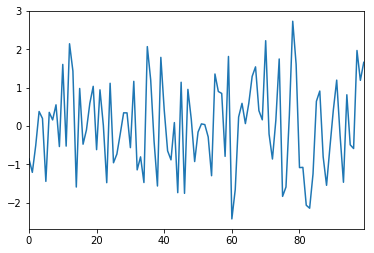

In [14]:
df.Stationary.plot()

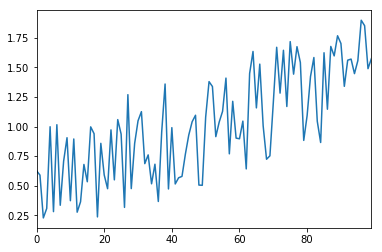

In [15]:
df.Nonstationary.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

results=adfuller(df.Stationary)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('/t%s: %f' % (key,value))

ADF Statistic: -7.599073
p-value: 0.000000
Critical Values:
/t1%: -3.498910
/t5%: -2.891516
/t10%: -2.582760


In [17]:
df['Returns'] = df.Nonstationary.pct_change()

In [18]:
df = df.dropna()
df.head()

,Stationary,Nonstationary,Returns
1,-1.206233,0.589763,-0.059346
2,-0.507831,0.228353,-0.612806
3,0.380223,0.308291,0.350065
4,0.199397,0.998356,2.238354
5,-1.441565,0.281444,-0.718092


In [19]:
df['Diff'] = df.Nonstationary.diff()

In [20]:
df = df.dropna()
df.head()

,Stationary,Nonstationary,Returns,Diff
2,-0.507831,0.228353,-0.612806,-0.361410
3,0.380223,0.308291,0.350065,0.079938
4,0.199397,0.998356,2.238354,0.690065
5,-1.441565,0.281444,-0.718092,-0.716912
6,0.357667,1.015406,2.607842,0.733962


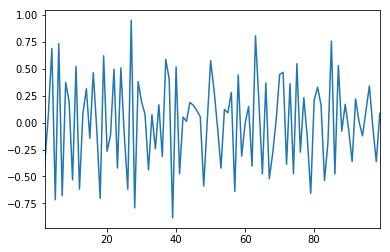

In [21]:
df.Diff.plot()